In [1]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from VAN_new import *

In [10]:
taille=20

In [9]:
y1= torch.tensor([[1.0 for i in range(taille//2)] + [0.0 for i in range(taille//2)]])
y2= torch.tensor([[0.0 for i in range(taille//2)] + [1.0 for i in range(taille//2)]])
y3=torch.tensor([[0.0 for i in range(taille)]])
y4=torch.tensor([[1.0 for i in range(taille)]])
y5=torch.tensor([[1.0, 0.0] *( taille//2)])

In [6]:
def log_prob_target(spins):
    ''''
    Compute the log probability of the target distribution
    spin confirgurations mostly up more likely (* 0.8) than mostly down (* 0.2)
    '''
    spin_size = spins.shape[1]
    log_probs = torch.ones(spins.shape[0]) * np.log(0.2)
    log_probs[spins.mean(-1) > 0.5] = np.log(0.8)
    return log_probs - np.log(2 ** (spin_size -1)) 

In [38]:


def log_prob_target_2(spins):
    """
    log proba de la target distribution. High probability if the forst spin is 1 and low otherwise
    """
    spin_size = spins.shape[1]
    log_probs = torch.ones(spins.shape[0]) * np.log(0.2)
    
    log_probs[torch.tensor([spins[i][0] > 0.5 for i in range(len(spins))] )] = np.log(0.8)
    
    return log_probs - np.log(2 ** (spin_size -1)) 
    


In [4]:

def energie1D(spin): 
    spin_copie=spin.clone()
    spin_copie[spin_copie==0]=-1
    spin_copie_1 = torch.roll(spin_copie, -1)
    spin_copie_2 = torch.roll(spin_copie, 1)

    
    energie=- torch.sum(spin_copie_1*spin_copie+spin_copie_2*spin_copie)
    return energie
    

def log_prob_energie(beta, energie):
    return -beta*energie


def log_prob_target_energie(spins):
    
    log_probs = torch.ones(spins.shape[0]) * np.log(0.01)
    
    for i in range(len(log_probs)):
        log_probs[i] = log_prob_energie(1, energie1D(spins[i]))
    return log_probs 

    

Epoch 0: 3.5981922149658203
Epoch 100: 0.4490809440612793
Epoch 200: 0.0053454553708434105
Epoch 300: -0.011062090285122395
Epoch 400: -0.008386504836380482
Epoch 500: 0.015020492486655712
Epoch 600: -0.012850326485931873
Epoch 700: -0.0058363075368106365
Epoch 800: -0.0050687906332314014
Epoch 900: 0.0028262825217097998


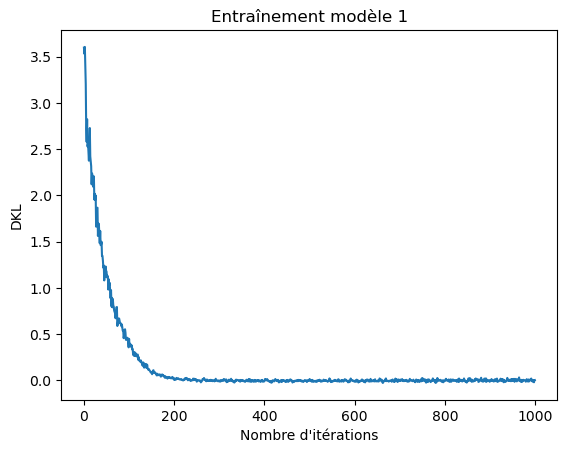

In [7]:
mymodel1 = VAN(taille)
losses = train(mymodel1, log_prob_target, batch_size=1000, n_iter=1000, lr=0.01)
plt.plot(losses)
plt.xlabel('Nombre d\'itérations')
plt.ylabel('DKL')
plt.title('Entraînement modèle 1')
plt.show()

In [12]:
print(mymodel1.prob_of_spins(y1))
print(mymodel1.prob_of_spins(y2))
print(mymodel1.prob_of_spins(y3))
print(mymodel1.prob_of_spins(y4))
print(mymodel1.prob_of_spins(y5))


tensor([9.0976e-07], grad_fn=<ProdBackward1>)
tensor([8.5168e-07], grad_fn=<ProdBackward1>)
tensor([3.1883e-09], grad_fn=<ProdBackward1>)
tensor([2.0146e-06], grad_fn=<ProdBackward1>)
tensor([8.8749e-07], grad_fn=<ProdBackward1>)


sur la distribution test donnée par la prof, ça marche plutôt bien

Epoch 0: 1.0483070611953735
Epoch 200: 0.5313571691513062
Epoch 400: 0.20454442501068115
Epoch 600: 0.0941215232014656
Epoch 800: -0.0071035404689610004
Epoch 1000: -0.058523427695035934
Epoch 1200: -0.08923422545194626
Epoch 1400: -0.09897401183843613
Epoch 1600: -0.10046868026256561
Epoch 1800: -0.0909799188375473


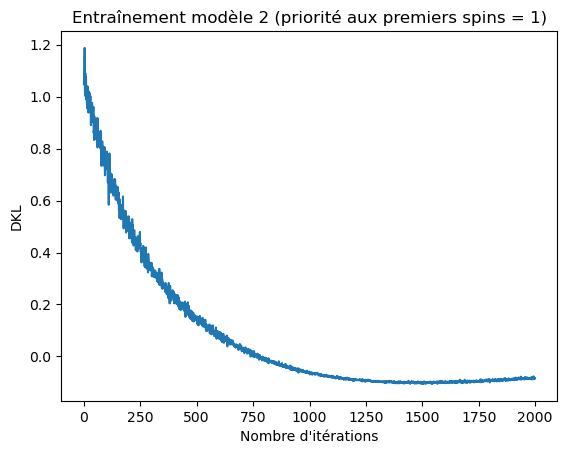

In [39]:
mymodel2 = VAN(input_size = taille)
loss=train(mymodel2, log_prob_target_2, batch_size=1000,n_iter=2000, lr=1e-3)

plt.plot(loss)
plt.xlabel('Nombre d\'itérations')
plt.ylabel('DKL')
plt.title('Entraînement modèle 2 (priorité aux premiers spins = 1)')
plt.show()

la loss devient négative, c'est gênant
Les prédictions sont pas trop mauvaises


In [40]:
print(mymodel2.prob_of_spins(y1))
print(mymodel2.prob_of_spins(y2))
print(mymodel2.prob_of_spins(y3))
print(mymodel2.prob_of_spins(y4))
print(mymodel2.prob_of_spins(y5))


tensor([0.0235], grad_fn=<ProdBackward1>)
tensor([0.0097], grad_fn=<ProdBackward1>)
tensor([0.0088], grad_fn=<ProdBackward1>)
tensor([0.0226], grad_fn=<ProdBackward1>)
tensor([0.0218], grad_fn=<ProdBackward1>)


<!-- entrainement pour modèle ising 1D -->

**Entrainement pour le modèle ising**


Epoch 0: 1.4522234201431274
Epoch 50: -0.3883729577064514
Epoch 100: -0.23950691521167755
Epoch 150: -0.1537339836359024
Epoch 200: -0.11203973740339279
Epoch 250: -0.12071147561073303
Epoch 300: -0.048816945403814316
Epoch 350: -0.018812065944075584
Epoch 400: -0.034403372555971146
Epoch 450: -0.027845699340105057


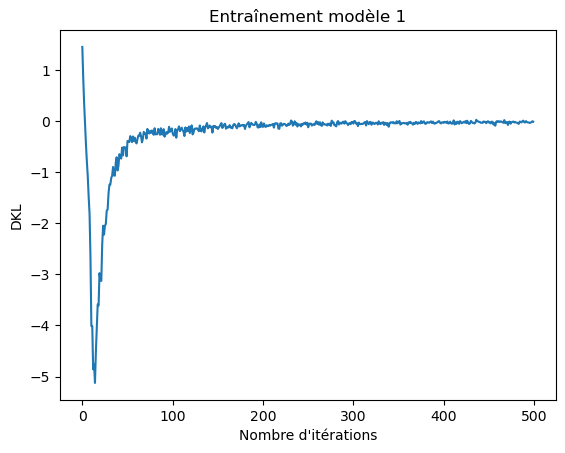

In [32]:
mymodel_ising = VAN(input_size = taille)
loss=train(mymodel_ising, log_prob_target_energie, batch_size=1000,n_iter=500, lr=1e-1)

plt.plot(loss)
plt.xlabel('Nombre d\'itérations')
plt.ylabel('DKL')
plt.title('Entraînement modèle 1')
plt.show()

In [36]:

y1= torch.tensor([[1.0 for i in range(taille//2)] + [0.0 for i in range(taille//2)]])
y2= torch.tensor([[0.0 for i in range(taille//2)] + [1.0 for i in range(taille//2)]])
y3=torch.tensor([[0.0 for i in range(taille)]])
y4=torch.tensor([[1.0 for i in range(taille)]])
y5=torch.tensor([[1.0, 0.0] *( taille//2)])

In [37]:
print(mymodel_ising.prob_of_spins(y1))
print(mymodel_ising.prob_of_spins(y2))
print(mymodel_ising.prob_of_spins(y3))
print(mymodel_ising.prob_of_spins(y4))
print(mymodel_ising.prob_of_spins(y5))


tensor([2.7426e-10], grad_fn=<ProdBackward1>)
tensor([1.5464e-06], grad_fn=<ProdBackward1>)
tensor([2.3381e-08], grad_fn=<ProdBackward1>)
tensor([0.9960], grad_fn=<ProdBackward1>)
tensor([3.4949e-09], grad_fn=<ProdBackward1>)


In [23]:
print(-torch.log(mymodel_ising.prob_of_spins(y1)))
print(-torch.log(mymodel_ising.prob_of_spins(y2)))
print(-torch.log(mymodel_ising.prob_of_spins(y3)))
print(-torch.log(mymodel_ising.prob_of_spins(y4)))
print(-torch.log(mymodel_ising.prob_of_spins(y5)))


tensor([inf], grad_fn=<NegBackward0>)
tensor([23.6201], grad_fn=<NegBackward0>)
tensor([37.9704], grad_fn=<NegBackward0>)
tensor([0.0047], grad_fn=<NegBackward0>)
tensor([78.6295], grad_fn=<NegBackward0>)


In [24]:
print(energie1D(y1))
print(energie1D(y2))
print(energie1D(y3))
print(energie1D(y4))
print(energie1D(y5))

tensor(-32.)
tensor(-32.)
tensor(-40.)
tensor(-40.)
tensor(40.)
